# Let's make another Anscombe's chart

- Ref: "https://www.research.autodesk.com/publications/same-stats-different-graphs/
- video: https://youtu.be/DbJyPELmhJc?si=oN4y87b-QI6auSK6

# 1. Read the file 'datasaurus'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/adfz088/Documents/BA1200/week3/datasaurus.csv')
df.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


# 2. How many rows of the dataset?

In [3]:
len(df)

1846

# 3. How many values of each category in a column 'dataset'?

In [4]:
df['dataset'].value_counts()

dataset
dino          142
away          142
h_lines       142
v_lines       142
x_shape       142
star          142
high_lines    142
dots          142
circle        142
bullseye      142
slant_up      142
slant_down    142
wide_lines    142
Name: count, dtype: int64

# 4. what's the mean of each category in a column 'dataset'?

In [5]:
df.groupby('dataset').mean()

,x,y
dataset,,
away,54.266100,47.834721
bullseye,54.268730,47.830823
circle,54.267320,47.837717
dino,54.263273,47.832253
dots,54.260303,47.839829
h_lines,54.261442,47.830252
high_lines,54.268805,47.835450
slant_down,54.267849,47.835896
slant_up,54.265882,47.831496


# 5. draw a scatter plot for 'dino' in a column 'dataset'

In [6]:
dino = df[df['dataset']=='dino']
dino

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333
...,...,...,...
137,dino,39.4872,25.3846
138,dino,91.2821,41.5385
139,dino,50.0000,95.7692
140,dino,47.9487,95.0000


Text(0, 0.5, 'y')

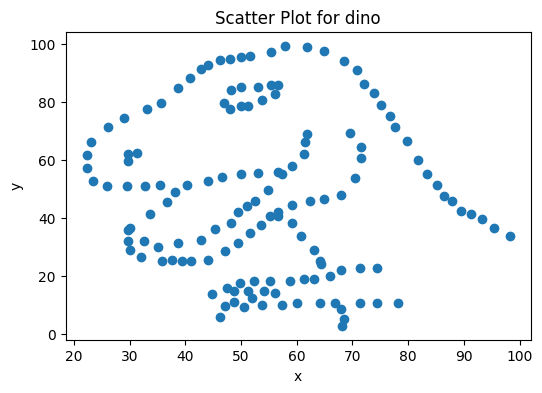

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(dino['x'], dino['y'])
plt.title(f'Scatter Plot for dino')
plt.xlabel('x')
plt.ylabel('y')

# 6. Add mean, var, std of x and y to the plot above
- xlabel, ylabel
- title
- legend


In [7]:
mean_x, var_x, std_x = dino['x'].mean(), dino['x'].var(), dino['x'].std()
mean_y, var_y, std_y = dino['y'].mean(), dino['y'].var(), dino['y'].std()

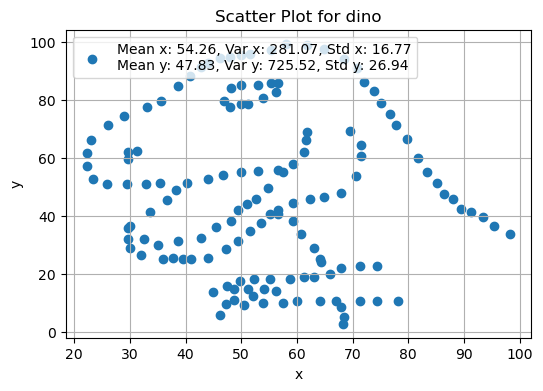

In [8]:
plt.figure(figsize=(6, 4))
plt.scatter(dino['x'], dino['y'])
plt.title(f'Scatter Plot for dino')
plt.xlabel('x')
plt.ylabel('y')

# Create legend with statistics
# legend_text = (f'Mean x: {mean_x:.2f}, Var x: {var_x:.2f}, Std x: {std_x:.2f}\n'
#             f'Mean y: {mean_y:.2f}, Var y: {var_y:.2f}, Std y: {std_y:.2f}')
plt.legend([f'Mean x: {mean_x:.2f}, Var x: {var_x:.2f}, Std x: {std_x:.2f}\n'
            f'Mean y: {mean_y:.2f}, Var y: {var_y:.2f}, Std y: {std_y:.2f}'], loc='upper left')

plt.grid(True)
plt.show()

# 7. Plot all scatterplots for each category in a 'dataset' column (using FOR loop)
- Recycle the code above

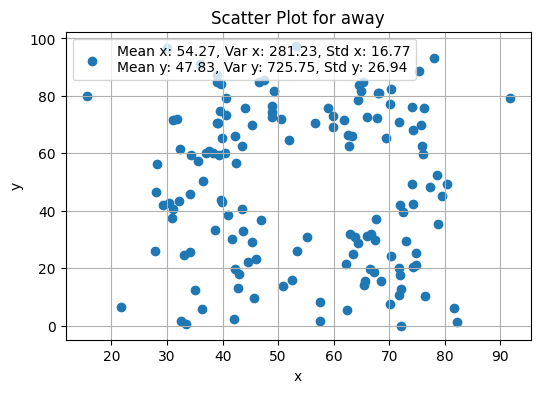

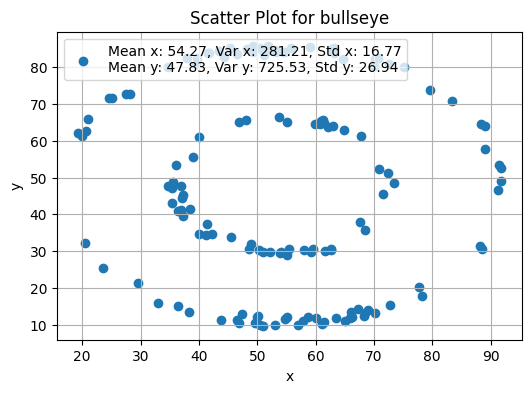

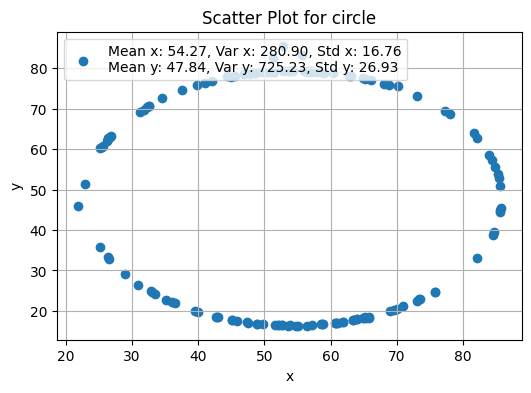

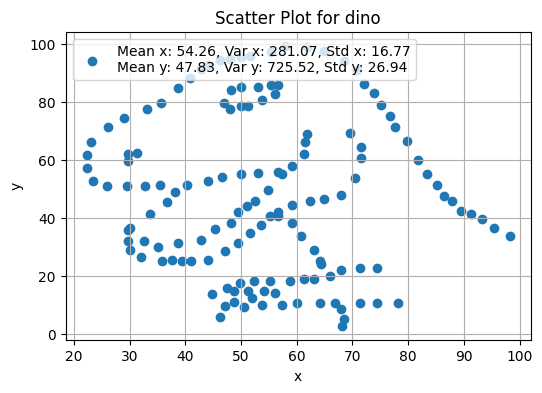

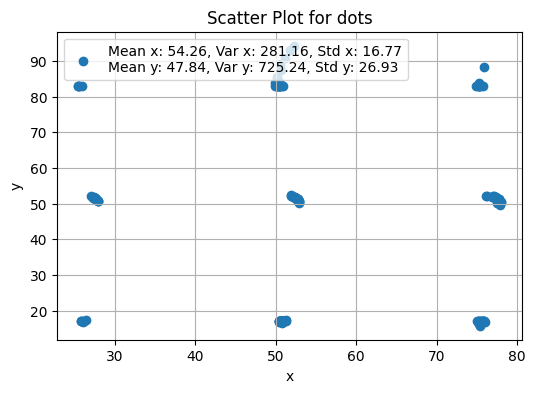

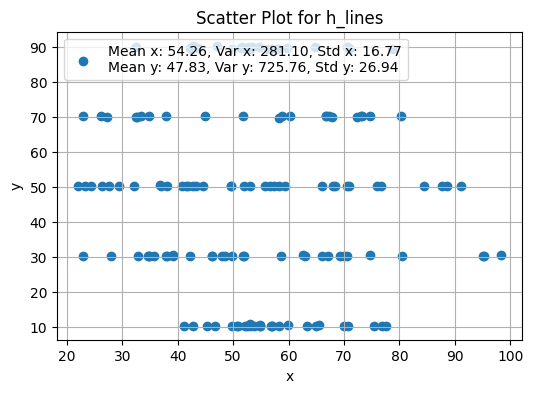

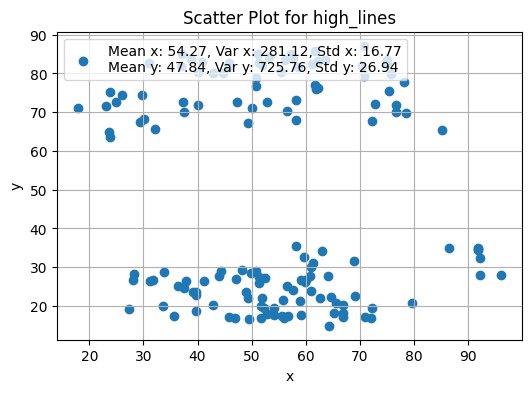

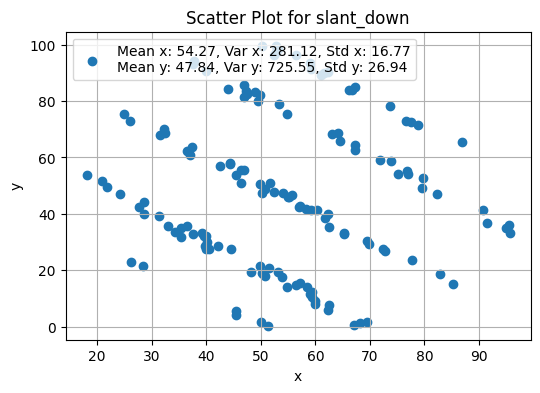

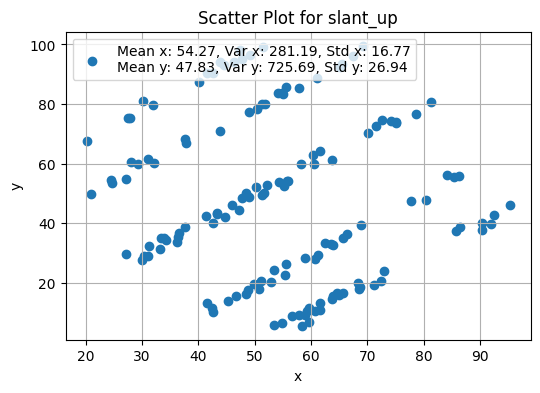

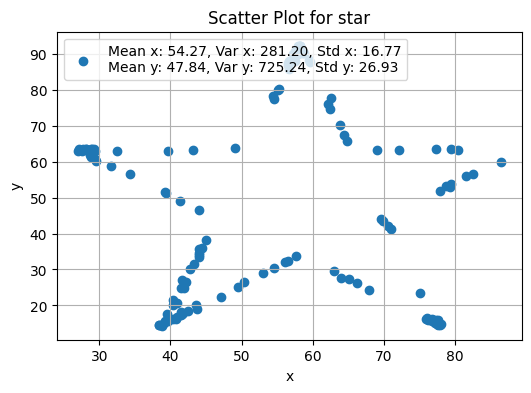

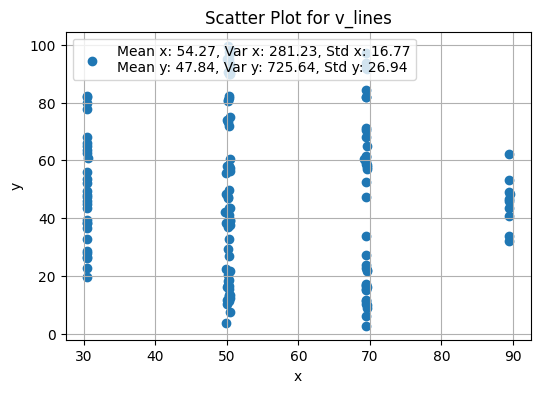

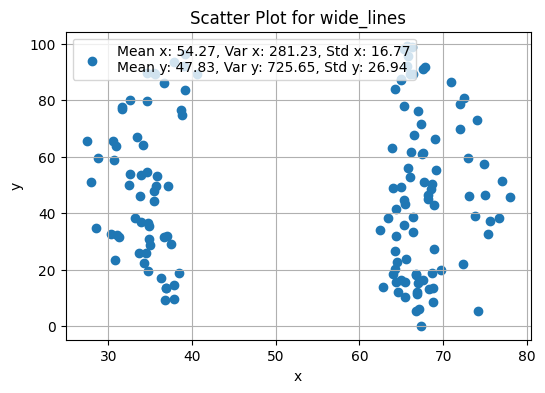

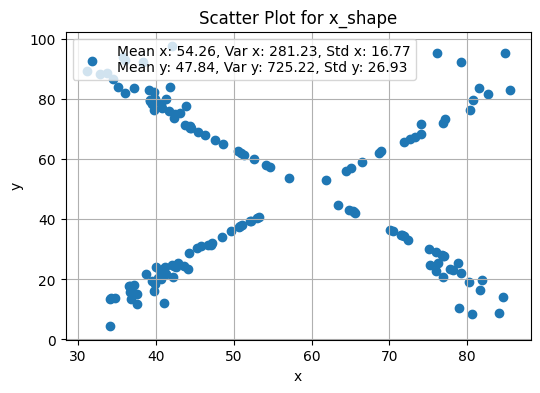

In [23]:
for name, group in df.groupby('dataset'):
    plt.figure(figsize=(6, 4))
    plt.scatter(group['x'], group['y'])
    plt.title(f'Scatter Plot for {name}')
    plt.xlabel('x')
    plt.ylabel('y')

    # Calculate mean, variance, and standard deviation for x and y
    mean_x, var_x, std_x = group['x'].mean(), group['x'].var(), group['x'].std()
    mean_y, var_y, std_y = group['y'].mean(), group['y'].var(), group['y'].std()

    # Create legend with statistics
    legend_text = (f'Mean x: {mean_x:.2f}, Var x: {var_x:.2f}, Std x: {std_x:.2f}\n'
                   f'Mean y: {mean_y:.2f}, Var y: {var_y:.2f}, Std y: {std_y:.2f}')
    plt.legend([legend_text], loc='upper left')

    plt.grid(True)
    plt.show()


# Use amazing libraries to create such plots

Data Morph transforms an input dataset of 2D points into select shapes, while preserving the summary statistics to a given number of decimal points through simulated annealing.

In [13]:
# install data-morph-ai (https://github.com/stefmolin/data-morph)
!pip install data-morph-ai

In [33]:
# Load dataset using DataLoader.load_dataset('object') 
# available object: DataLoader.AVAILABLE_DATASETS

from data_morph.data.loader import DataLoader

dataset = DataLoader.load_dataset('panda')


In [31]:
dataset.data

,x,y
0,75.87,71.84
1,78.62,73.34
2,80.37,75.34
3,81.12,77.59
4,81.62,80.59
...,...,...
684,77.12,41.84
685,84.87,33.34
686,84.62,28.09
687,82.12,25.34


In [32]:
DataLoader.AVAILABLE_DATASETS

['bunny',
 'cat',
 'dino',
 'dog',
 'gorilla',
 'music',
 'panda',
 'pi',
 'Python',
 'SDS',
 'sheep',
 'soccer']

In [34]:
from data_morph.shapes.factory import ShapeFactory

ShapeFactory.AVAILABLE_SHAPES

['bullseye',
 'circle',
 'club',
 'diamond',
 'dots',
 'down_parab',
 'figure_eight',
 'h_lines',
 'heart',
 'high_lines',
 'left_parab',
 'rectangle',
 'right_parab',
 'rings',
 'scatter',
 'slant_down',
 'slant_up',
 'spade',
 'spiral',
 'star',
 'up_parab',
 'v_lines',
 'wide_lines',
 'x']

In [36]:
# Select Target object: ShapeFactory.AVAILABLE_SHAPES

from data_morph.shapes.factory import ShapeFactory

shape_factory = ShapeFactory(dataset)
target_shape = shape_factory.generate_shape('star')

In [37]:
# save the result in your local folder

from data_morph.morpher import DataMorpher

morpher = DataMorpher(
    decimals=2,
    in_notebook=False,  # whether you are running in a Jupyter Notebook
    output_dir='data_morph/output',
)

result = morpher.morph(start_shape=dataset, target_shape=target_shape)

Output()

In [38]:
result

,x,y
0,79.145125,66.076178
1,91.341434,66.030834
2,92.343807,67.044815
3,83.588388,68.872447
4,80.360042,65.333502
...,...,...
684,81.255111,55.696828
685,76.541600,24.216055
686,75.838758,21.452821
687,76.512270,23.839277


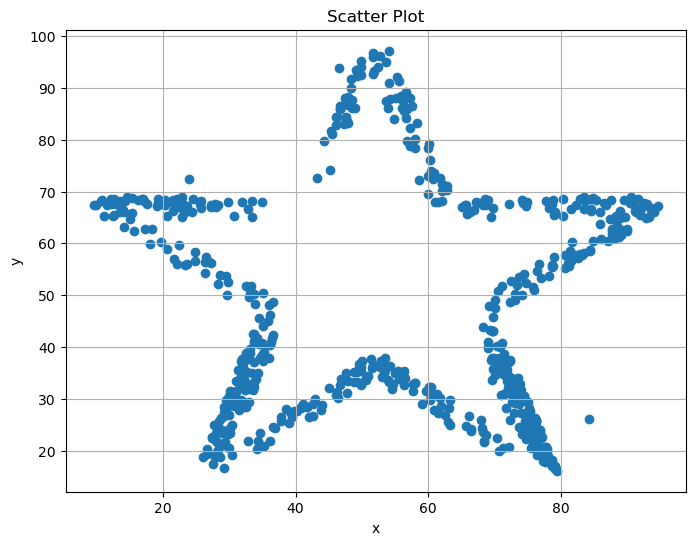

In [39]:
# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(result['x'], result['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

# Create your own dataset
1) If you just want to plot points on your own, go to  http://robertgrantstats.co.uk/drawmydata.html
    
2) If you want to plot points based on a picture that you choose, go to https://www.mobilefish.com/services/record_mouse_coordinates/record_mouse_coordinates.php